# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


In [3]:
# cities = cities[:5]
# cities

['margaret river', 'sao lourenco do sul', 'brush', 'college', 'polyarnyy']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | porto novo
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | sur
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | nizhneangarsk
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | puerto ayacucho
Processing Record 11 of Set 1 | batticaloa
Processing Record 12 of Set 1 | selkirk
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | vadso
Processing Record 20 of Set 1 | bossangoa
Processing Record 21 of Set 1 | mel'nikovo
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23

In [8]:
# city_weather['main']["temp_max"]

{'coord': {'lon': 33.3362, 'lat': 69.2551},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 58.41,
  'feels_like': 57.67,
  'temp_min': 58.41,
  'temp_max': 58.41,
  'pressure': 1011,
  'humidity': 79,
  'sea_level': 1011,
  'grnd_level': 1004},
 'visibility': 10000,
 'wind': {'speed': 10.76, 'deg': 120, 'gust': 16.82},
 'clouds': {'all': 100},
 'dt': 1693500045,
 'sys': {'country': 'RU', 'sunrise': 1693447232, 'sunset': 1693503253},
 'timezone': 10800,
 'id': 562245,
 'name': 'Gadzhiyevo',
 'cod': 200}

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,56.86,72,14,4.47,ZA,1694718460
1,blackmans bay,-43.0167,147.3167,60.93,64,100,8.68,AU,1694718716
2,porto novo,6.4965,2.6036,78.62,88,13,7.27,BJ,1694718716
3,hamilton,39.1834,-84.5333,79.59,49,100,6.91,US,1694718477
4,sur,22.5667,59.5289,84.38,71,100,12.48,OM,1694718717


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,56.86,72,14,4.47,ZA,1694718460
1,blackmans bay,-43.0167,147.3167,60.93,64,100,8.68,AU,1694718716
2,porto novo,6.4965,2.6036,78.62,88,13,7.27,BJ,1694718716
3,hamilton,39.1834,-84.5333,79.59,49,100,6.91,US,1694718477
4,sur,22.5667,59.5289,84.38,71,100,12.48,OM,1694718717


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

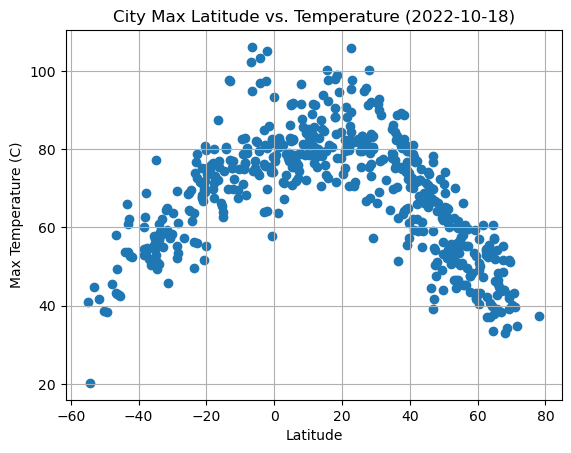

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

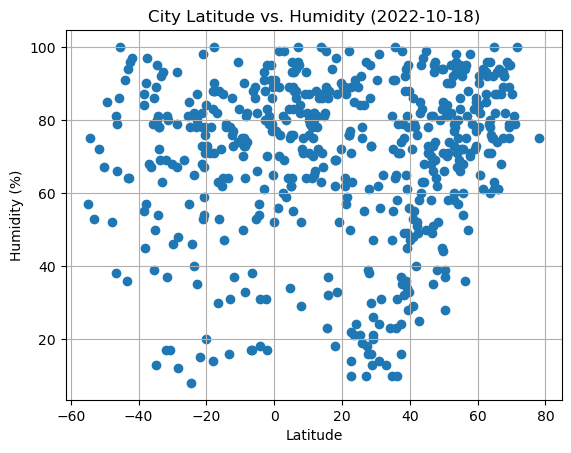

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

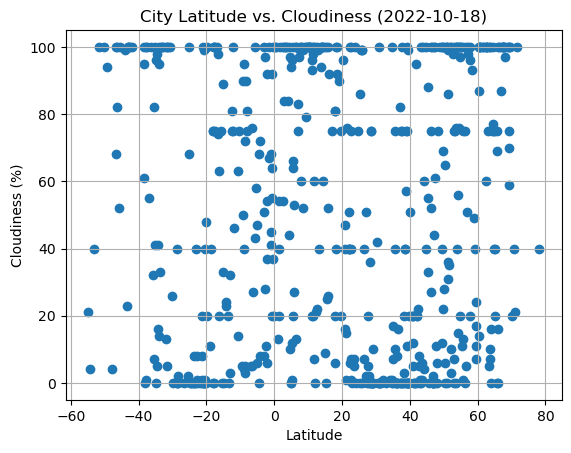

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

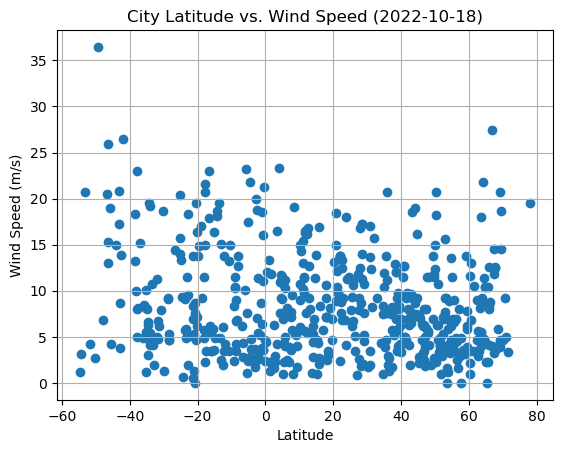

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [20]:
def test(dog, cat, mouse):
     # Build the scatter plots for latitude vs. wind speed
    plt.scatter(dog, cat)

    # Incorporate the other graph properties
    plt.title(mouse)
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.grid(True)

    # Save the figure
    plt.savefig("output_data/Fig4.png")

    # Show plot
    plt.show()

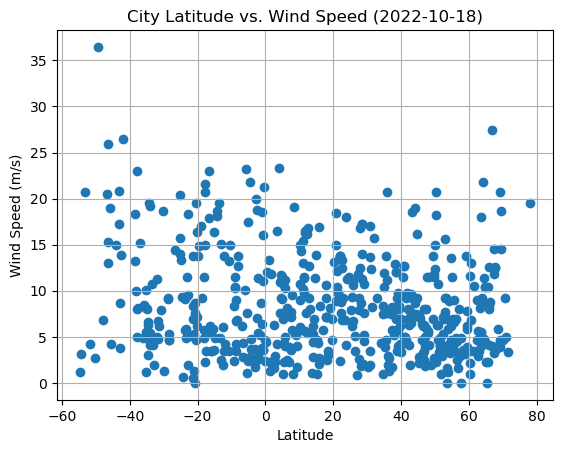

In [21]:
test(city_data_df["Lat"], city_data_df["Wind Speed"], "City Latitude vs. Wind Speed (2022-10-18)")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [8]:
# Define a function to create Linear Regression plots
def linear_plots(x, y, x_coord, y_coord):
    slope, intercept, r, p, se = linregress(x, y)
     # Build the scatter plots for latitude vs. wind speed
    plt.scatter(x, y)

    # Incorporate the other graph properties
    # plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y.name)
    # plt.grid(True)
    y_values = slope*x+intercept
    plt.plot(x, y_values, color = "red")
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation, (x_coord, y_coord), color = "red", fontsize = 15)

    # Save the figure
    # plt.savefig("output_data/Fig4.png")
    print(f"The r-value is: {r**2}")
    # Show plot
    plt.show()

In [3]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,porto novo,6.4965,2.6036,78.62,88,13,7.27,BJ,1694718716
3,hamilton,39.1834,-84.5333,79.59,49,100,6.91,US,1694718477
4,sur,22.5667,59.5289,84.38,71,100,12.48,OM,1694718717
6,nizhneangarsk,55.7833,109.5500,45.39,68,13,8.97,RU,1694718717
8,bethel,41.3712,-73.4140,77.90,55,0,9.22,US,1694718547


In [4]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,56.86,72,14,4.47,ZA,1694718460
1,blackmans bay,-43.0167,147.3167,60.93,64,100,8.68,AU,1694718716
5,uturoa,-16.7333,-151.4333,76.48,82,100,23.02,PF,1694718717
7,invercargill,-46.4000,168.3500,43.02,79,82,13.00,NZ,1694718718
16,adamstown,-25.0660,-130.1015,64.40,57,100,20.40,PN,1694718720


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6464157607149816


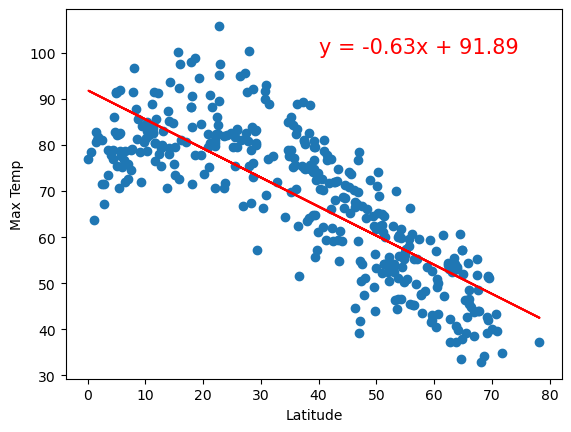

In [10]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_plots(x, y, 40, 100)

The r-value is: 0.6385828278767873


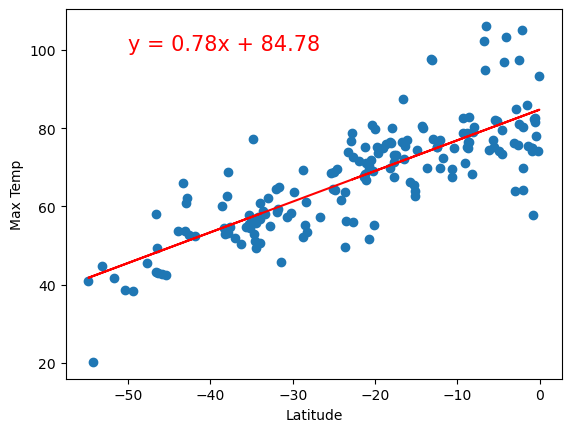

In [12]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_plots(x, y, -50, 100)

**Discussion about the linear relationship:** In both the Southern and the Northern Hemisphere there is a strong relationship between Latitude and Max Temperature. In the Northern Hemisphere it is a negative relationship, and in the Sourthern Hemisphere it is a positive relationship. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0112618478640598


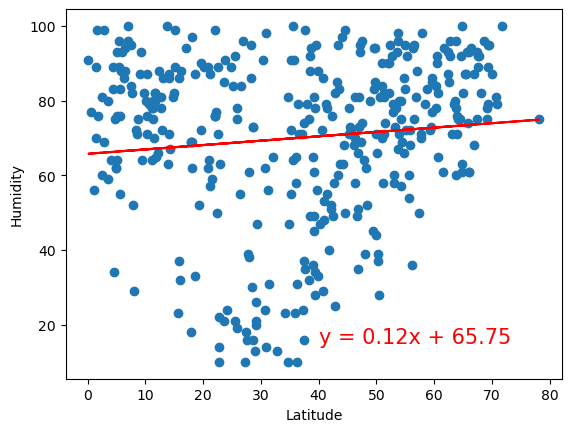

In [14]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_plots(x, y, 40, 15)

The r-value is: 0.00021813158287926402


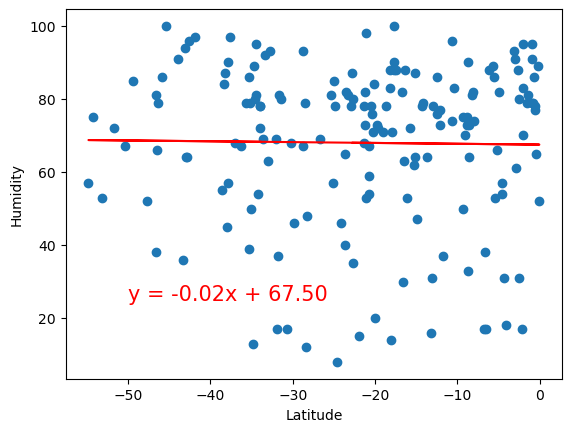

In [21]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_plots(x, y, -50, 25)

**Discussion about the linear relationship:** There is not a strong relationship between Humidity and Latitude in either the Northern or the Southern Hempisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00020455907807743066


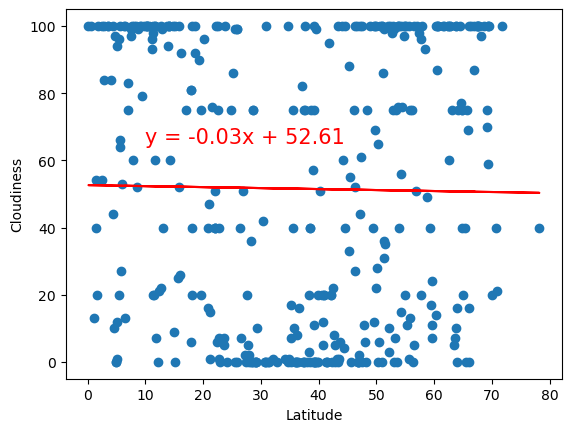

In [17]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_plots(x, y, 10, 65)

The r-value is: 0.018750563502307936


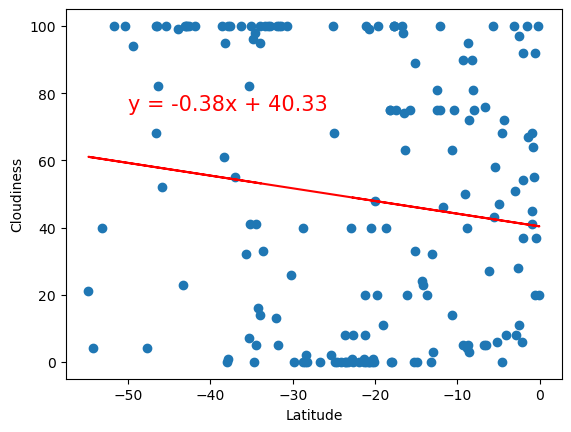

In [23]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_plots(x, y, -50, 75)

**Discussion about the linear relationship:** There is not a strong relationship between Cloudiness and Latitude in either the Northern or the Southern Hempisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004877616557002075


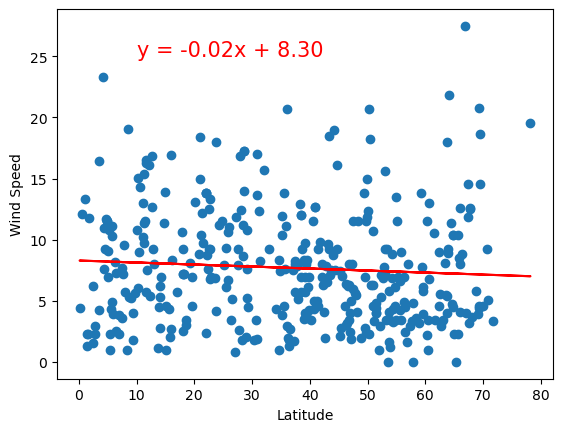

In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_plots(x, y, 10, 25)

The r-value is: 0.0258817972706917


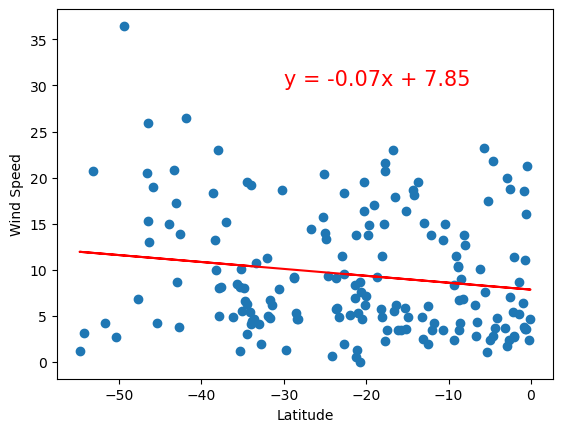

In [25]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_plots(x, y, -30, 30)

**Discussion about the linear relationship:** There is not a strong relationship between Wind Speed and Latitude in either the Northern or the Southern Hempisphere.